In [206]:
import eigenvalues

In [213]:
from eigenvalues import *

In [214]:
import numpy as np
import scipy.linalg as linear

In [215]:
from matplotlib import pyplot as plt

In [216]:
import matplotlib.image as mpimg

In [217]:
import imp

In [218]:
imp.reload(eigenvalues)

<module 'eigenvalues' from 'eigenvalues.pyc'>

In [219]:
def SVD(A, tol=1e-7):
    '''
    Given a matrix A, return its Singular Value Decomposition. That is, A i
    
    and reducing the dimension of A to (M-1,M-1) until A becomes a single number.
    This algorithm converges to an upper triangle matrix with the eigenvalues of A in the diagonal. If A is symmetric, the Q matrices of each iteration can be accumulated to approximate the normal eigenvectors
    
    Parameters
    ----------
    A : (M, N) double ndarray
        A real matrix whose SVD will be calculated.
    tol : double, optional
         Cutoff point that determines 'important' singular values. Default is 1e-7.
        
    Returns
    -------
    U : (M, k) double ndarray
        A unitary matrix that contains the first k left singular vectors of A.
    S : (k, k) double ndarray
        A square real diagonal matrix whose elements are the k singular values of A greater that the tolerance. 
    V : (k, N) 
        A unitary matrix that contains the first k right singular vectors of A.
    '''
    rows, cols = A.shape
    if rows > cols: # Method procedes with lower rank matrix between AA* and A*A
        L, U, _ = shiftQR(np.dot(A,A.T), calcQ = True)
    else:
        L, V, _ = shiftQR(np.dot(A.T,A), calcQ = True)
    singularValues = [(x**0.5) if x > 0 else tol for x in L] # The singular values of A are the square root of the eigenvalues returned
    k = 0
    while k < len(singularValues) and singularValues[k] > tol: # Determine cutoff point 
        k+=1
        
    S = np.diag(singularValues[:k])
    
    if rows > cols: # Calculate remaining singular vectors depending on path chosen at the beginning
        U = U[:,:k]
        V = np.array([1/singularValues[i]*A.T.dot(U[:,i]) for i in range(k)]).T
    else:
        V = V[:,:k]
        U = np.array([1/singularValues[i]*A.dot(V[:,i]) for i in range(k)]).T
    return U, S, V

In [220]:
A = np.array([[1,2,3],[4,5,6],[7,8,9], [10,11,12]])

In [221]:
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [222]:
u,s,v = SVD(A)

In [223]:
u.dot(s).dot(v.T)

array([[-0.80979033, -0.06082192,  0.68814649],
       [-0.41855027, -0.03143657,  0.35567713],
       [-0.02731022, -0.00205122,  0.02320777],
       [ 0.36392984,  0.02733413, -0.30926159]])

In [224]:
B = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [225]:
u,s,v = SVD(B)

In [226]:
s

array([[  2.54368356e+01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.72261225e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.16993518e-07]])

In [227]:
u.dot(s).dot(v.T)

array([[-1.12250651, -0.44395316,  0.23460019,  0.91315354],
       [-0.32114289, -0.12701254,  0.06711781,  0.26124817],
       [ 0.48022072,  0.18992808, -0.10036456, -0.3906572 ]])

In [228]:
img = mpimg.imread("./Ejercicios/assets/gb.jpg")

In [229]:
img = img.astype('float')

In [230]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

red = np.array(red)
green = np.array(green)
blue = np.array(blue)

In [232]:
u1, s1, v1 = SVD(red, 500)
u2, s2, v2 = SVD(green, 500)
u3, s3, v3 = SVD(blue, 500)

In [233]:
newRed = u1.dot(s1).dot(v1.T)
newGreen = u2.dot(s2).dot(v2.T)
newBlue = u3.dot(s3).dot(v3.T)


In [234]:
newRed.shape

(400, 300)

In [235]:
newImg = [] 

In [236]:
red.shape

(400, 300)

In [237]:
for i in range(len(red)):
    newImg.append([])
    for j in range(len(red[0])):
        newImg[i].append([newRed[i][j], newGreen[i][j], newBlue[i][j]])

In [238]:
newImg = np.array(newImg)

In [240]:
newImg

array([[[ -1.66493272e-10,  -3.46310844e-10,   1.30281978e-10],
        [  2.48100162e-10,   2.91178897e-10,  -2.98361435e-10],
        [  7.22061074e-11,   2.90076349e-10,   4.18594461e-10],
        ..., 
        [  1.36702914e-11,  -1.18834860e-11,   1.05798856e-11],
        [  4.94667519e-11,   5.47761760e-11,   3.46506806e-11],
        [ -1.97978990e-11,  -4.69216349e-12,  -9.61027618e-13]],

       [[  7.30012208e-10,   1.20362101e-11,   3.26979363e-10],
        [ -6.26422696e-10,  -7.90099755e-11,   3.71518149e-10],
        [ -9.09482078e-11,  -3.82121133e-11,  -3.44308445e-10],
        ..., 
        [  2.28127427e-11,  -1.17270321e-11,  -4.74014969e-11],
        [ -6.04995510e-11,   1.00426622e-11,   7.20811672e-12],
        [  9.34314201e-12,  -2.37825577e-11,  -3.74999626e-11]],

       [[  5.23319125e-10,  -3.18794726e-10,  -2.44480328e-10],
        [ -7.45603748e-10,   1.98859469e-10,   3.42928056e-11],
        [  6.68109967e-10,  -7.78332517e-11,  -6.98905545e-11],
        

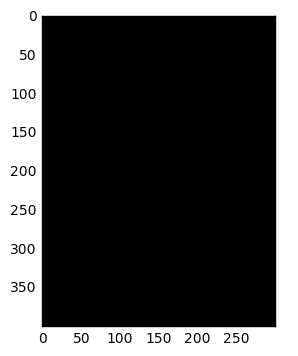

In [239]:
plt.imshow(newImg.astype('uint8'))
plt.
plt.show()